In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
df=pd.read_excel('./data/North_Carolina/AP_Test_Results_2023.xlsx',sheet_name='fortablebysch3yrs_2223_final') 

PermissionError: [Errno 13] Permission denied: './data/North_Carolina/AP_Test_Results_2023.xlsx'

In [5]:
df=pd.read_excel('data/CCIHE2021-PublicData.xlsx',sheet_name='Data')

In [9]:
df=pd.read_excel('data/North_Carolina/AP_Test_Results_2023.xlsx',sheet_name='fortablebysch3yrs_2223_final')

PermissionError: [Errno 13] Permission denied: 'data/North_Carolina/AP_Test_Results_2023.xlsx'

In [24]:
df = pd.read_csv('data/North_Carolina/AP_Test_Results_2023.csv',header=1)


In [25]:
df.head()

,Unnamed: 0,School System & School,Unnamed: 2,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,,,North Carolina,75393,16.1,45610,60.5,136664,80756,59.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NC School of Science & Math,343,*,268,78.1,545,417,76.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NC School of the Arts,128,*,109,85.2,238,198,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010,NaN,Alamance-Burlington,756,10.7,406,53.7,1284,667,51.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.columns

Index(['Unnamed: 0', 'School System & School', 'Unnamed: 2',
       '# of Test Takers1', 'Participation Rate2',
       '# of Test-taker Scoring 3 or Higher3',
       '% of Test-Takers Scoring 3 or Higher4', '# of Exams Taken5',
       '# of Exams with Scores of 3 or Higher6',
       '% of Exams with Scores of 3 or Higher7', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              619 non-null    object 
 1   School System & School                  436 non-null    object 
 2   Unnamed: 2                              612 non-null    object 
 3   # of Test Takers1                       599 non-null    object 
 4   Participation Rate2                     599 non-null    object 
 5   # of Test-taker Scoring 3 or Higher3    599 non-null    object 
 6   % of Test-Takers Scoring 3 or Higher4   599 non-null    object 
 7   # of Exams Taken5                       599 non-null    object 
 8   # of Exams with Scores of 3 or Higher6  599 non-null    object 
 9   % of Exams with Scores of 3 or Higher7  599 non-null    object 
 10  Unnamed: 10                             0 non-null      float6

In [28]:
df.fillna('',inplace=True)

C:\Users\shazr\AppData\Local\Temp\ipykernel_50204\3094999256.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('',inplace=True)


In [29]:
df.head()

,Unnamed: 0,School System & School,Unnamed: 2,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,,,North Carolina,75393,16.1,45610,60.5,136664,80756,59.1,,,,,,,
1,,,NC School of Science & Math,343,*,268,78.1,545,417,76.5,,,,,,,
2,,,NC School of the Arts,128,*,109,85.2,238,198,83.2,,,,,,,
3,,,,,,,,,,,,,,,,,
4,010,,Alamance-Burlington,756,10.7,406,53.7,1284,667,51.9,,,,,,,


In [31]:
df.rename(columns={
    'Unnamed: 2': 'School_System',
}, inplace=True)

In [32]:
df.head()

,Unnamed: 0,School_System,School_System,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,,,North Carolina,75393,16.1,45610,60.5,136664,80756,59.1,,,,,,,
1,,,NC School of Science & Math,343,*,268,78.1,545,417,76.5,,,,,,,
2,,,NC School of the Arts,128,*,109,85.2,238,198,83.2,,,,,,,
3,,,,,,,,,,,,,,,,,
4,010,,Alamance-Burlington,756,10.7,406,53.7,1284,667,51.9,,,,,,,


In [35]:
carnegie21=df[['School_System','# of Test Takers1','Participation Rate2','# of Test-taker Scoring 3 or Higher3']] 

In [36]:
carnegie21.head()

,School_System,School_System,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3
0,,North Carolina,75393,16.1,45610
1,,NC School of Science & Math,343,*,268
2,,NC School of the Arts,128,*,109
3,,,,,
4,,Alamance-Burlington,756,10.7,406


In [39]:
x=carnegie21['# of Test Takers1']
y=carnegie21['Participation Rate2']


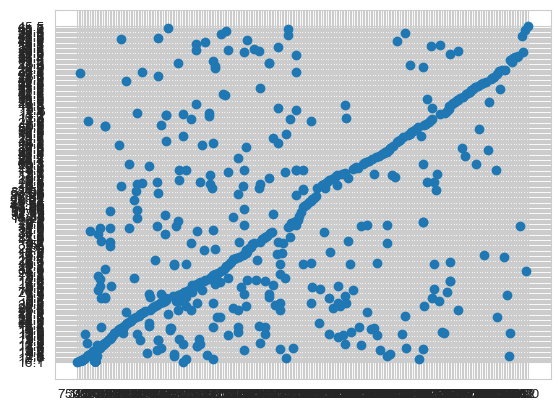

In [40]:
plt.scatter(x,y)
p